<a href="https://colab.research.google.com/github/CDspana/Credit-Card-Fraud-Detection/blob/main/Credit_Card_Fraud_Detection_AutoEnconders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/creditcard.csv')

In [ ]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

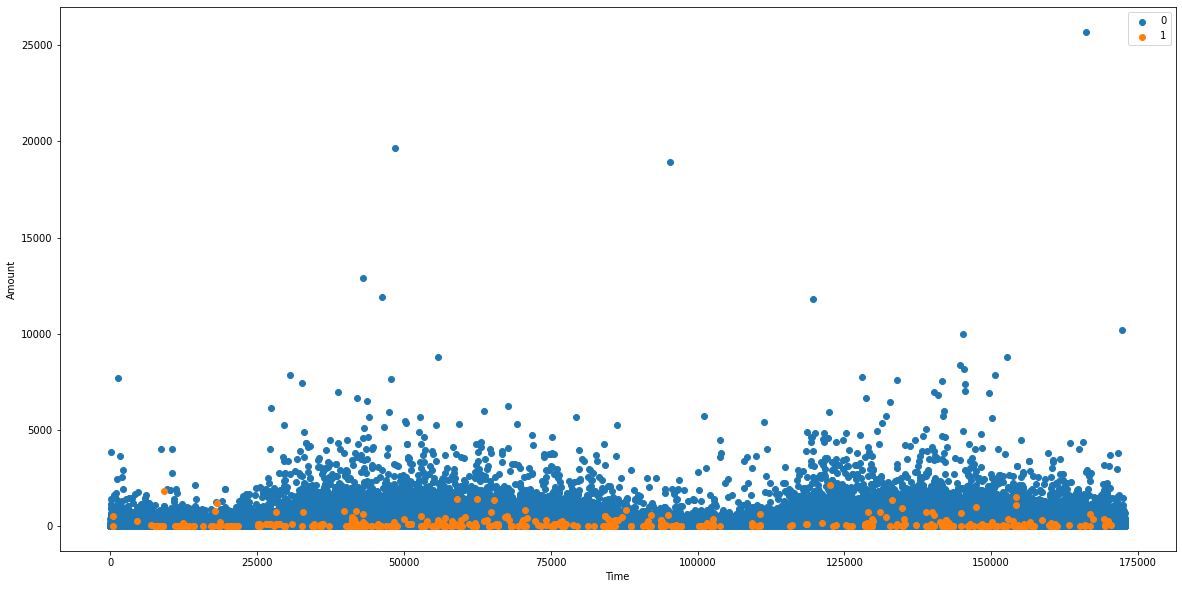

In [ ]:
plt.figure(figsize=(20,10))

for i in [0, 1]:
  data = df[df['Class'] == i]
  plt.scatter(data['Time'], data['Amount'], label = i)

plt.legend()
plt.xlabel('Time')
plt.ylabel('Amount')

plt.show()

In [ ]:
df.drop(['Time'], axis = 1, inplace = True)

In [ ]:
from sklearn.preprocessing import StandardScaler

df['Amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350151,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254117,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.081839,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313249,0


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(df, test_size=0.2, random_state=42)

X_train = X_train[X_train['Class'] == 0]
X_train = X_train.drop(['Class'], axis = 1)
X_train = X_train.values


y_test = X_test['Class']
X_test = X_test.drop(['Class'], axis = 1) 
X_test = X_test.values

In [ ]:
np.random.seed(5)
from keras.layers import Input, Dense
from keras.models import Model
from keras.optimizers import SGD

In [ ]:
dim_input = X_train.shape[1]

capa_entrada = Input(shape=(dim_input,))

encoder = Dense(20, activation='tanh')(capa_entrada)
encoder = Dense(14, activation='relu')(encoder)

decoder = Dense(20, activation='tanh')(encoder)
decoder = Dense(29, activation='relu')(decoder)

autoencoder = Model(inputs=capa_entrada, outputs=decoder)


In [ ]:
sgd = SGD(learning_rate=0.01)
autoencoder.compile(optimizer='sgd', loss='mse')

In [ ]:
autoencoder.fit(X_train, X_train, epochs=100, batch_size=32, shuffle=True, validation_data=(X_test,X_test), verbose=1)

Epoch 1/100
3554/3554 [==============================] - 16s 4ms/step - loss: 0.9776 - val_loss: 0.9545
Epoch 2/100
3554/3554 [==============================] - 12s 3ms/step - loss: 0.8947 - val_loss: 0.8978
Epoch 3/100
3554/3554 [==============================] - 11s 3ms/step - loss: 0.8516 - val_loss: 0.8629
Epoch 4/100
3554/3554 [==============================] - 11s 3ms/step - loss: 0.8157 - val_loss: 0.8299
Epoch 5/100
3554/3554 [==============================] - 9s 3ms/step - loss: 0.7891 - val_loss: 0.8089
Epoch 6/100
3554/3554 [==============================] - 9s 3ms/step - loss: 0.7704 - val_loss: 0.7917
Epoch 7/100
3554/3554 [==============================] - 10s 3ms/step - loss: 0.7543 - val_loss: 0.7767
Epoch 8/100
3554/3554 [==============================] - 9s 3ms/step - loss: 0.7405 - val_loss: 0.7644
Epoch 9/100
3554/3554 [==============================] - 11s 3ms/step - loss: 0.7294 - val_loss: 0.7544
Epoch 10/100
3554/3554 [==============================] - 9s 3ms/st

In [ ]:
X_pred = autoencoder.predict(X_test)

1781/1781 [==============================] - 5s 3ms/step


In [ ]:
ecm = np.mean(np.power(X_test-X_pred,2), axis=1)

In [ ]:
print(X_pred.shape)

(56962, 29)


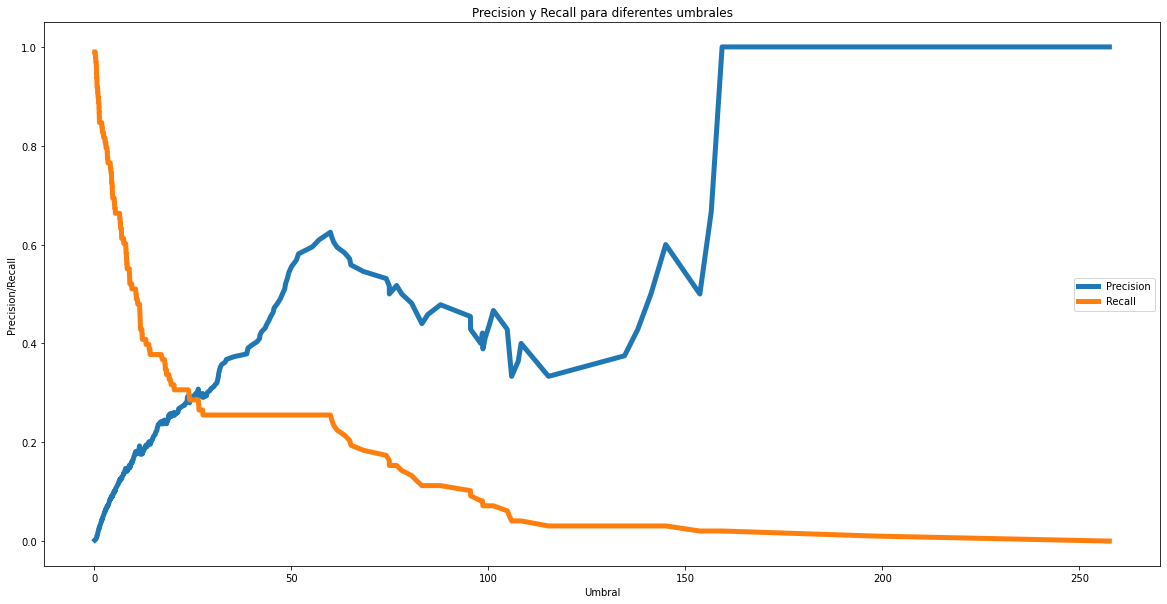

In [ ]:
from sklearn.metrics import  precision_recall_curve

precision, recall, umbral = precision_recall_curve(y_test, ecm)

plt.figure(figsize=(20,10))
plt.plot(umbral, precision[1:], label="Precision",linewidth=5)
plt.plot(umbral, recall[1:], label="Recall",linewidth=5)
plt.title('Precision y Recall para diferentes umbrales')
plt.xlabel('Umbral')
plt.ylabel('Precision/Recall')
plt.legend()
plt.show()

In [ ]:
umbral_fijo = 0.75
Y_pred = [1 if e > umbral_fijo else 0 for e in ecm]

In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, Y_pred)
print(conf_matrix)

[[49385  7479]
 [    8    90]]


# Conclusion

From the confusion matrix it can be seen that 49385 normal records were correctly classified and 7479 normal records were classified as fraudulent. In other words, there is a high number of false positives and therefore a precision of 0.01.

On the other hand 90 fraudulent records were correctly classified and only 8 fraudulent records were classified as normal, giving a recall of 0.92.

With the above, it can be concluded that the Autoencoder designed, and with the selected threshold, performs well in detecting fraudulent records





